<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


Load the data


In [ ]:
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/Coursera/Applied Data Science Capstone/Week_4/dataset_part_2.csv")

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
X = pd.read_csv("gdrive/My Drive/Colab Notebooks/Coursera/Applied Data Science Capstone/Week_4/dataset_part_3.csv")

In [ ]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,525.000000,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,677.000000,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,500.000000,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,3170.000000,1.0,False,False,False,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [ ]:
Y = data["Class"].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
# students get this
transform = preprocessing.StandardScaler()

In [ ]:
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

we can see we only have 18 test samples.


In [ ]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10, return_train_score=True, verbose=4)

In [ ]:
logreg_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.812, test=0.625) total time=   0.0s
[CV 2/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.875, test=0.750) total time=   0.0s
[CV 3/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 4/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 5/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.846, test=0.714) total time=   0.0s
[CV 6/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 7/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.846, test=0.714) total time=   0.0s
[CV 8/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 9/10] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 10/10] END C=0.01, penalty=l2, solv

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             return_train_score=True, verbose=4)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

Lets look at the confusion matrix:


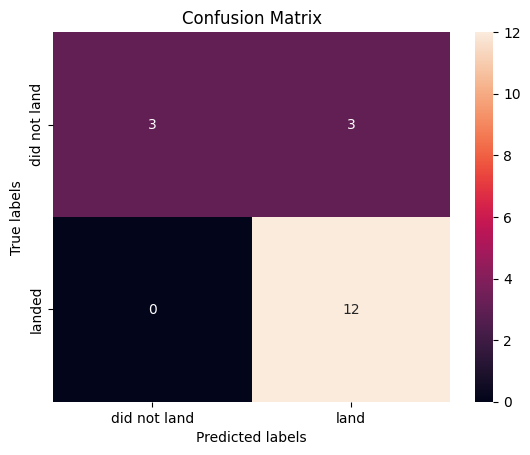

In [ ]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, parameters, cv=10, return_train_score=True, verbose=4)

In [ ]:
svm_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
[CV 1/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 2/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 3/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 5/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 6/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 7/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 8/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 9/10] END C=0.001, gamma=0.001, kernel=linear;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 10/1

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             return_train_score=True, verbose=4)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


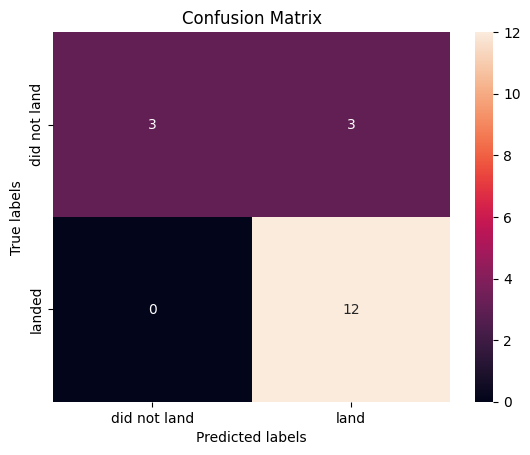

In [ ]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, parameters, cv=10, return_train_score=True, verbose=4)

In [ ]:
tree_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
[CV 1/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.688, test=0.625) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.891, test=0.750) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.708, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.692, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.862, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 10/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.800, test=0.714) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.734, test=0.875) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.846, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.677, test=0.429) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.769, test=0.571) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.677, test=0.429)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.723, test=0.857) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.846, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.692, test=0.571) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.723,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.734, test=0.625) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.719, test=0.875) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.831, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.738, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.846, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.859, test=1.000) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.877, test=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.800, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.800, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.692,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.923, test=0.571) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.908, test=0.857) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.812, test=0.875) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.938, test=0.875) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.954, test

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.877, test=0.857) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.750, test=0.500) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.875, test=0.750) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.892, t

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.797, test=0.750) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.875, test=0.750) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.797, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.831, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.908, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.815, test=0.857) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.846, test=0.714) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.692, test=0.143)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.938, test=0.750) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.862, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.908, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.815, test=0.571) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.969, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.969,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.892, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.908, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.923, test=0.714) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.908, test=0.286) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.708, test=0.857) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.862, test

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 7/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.692, test=0.429) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.800, test=1.000) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.785, test=0.714) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.875, test=0.875) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.8

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.877, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.938, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.923, test=0.714) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.954, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.908, test=0.714) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.969, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.985, test=0.857) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.846, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.831, test=0.571) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.815, test=0.714) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.875, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.785, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.785, test=0.714) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.815, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(



[CV 10/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.985, test=0.714) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.953, test=0.875) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.969, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.985, test=0.857) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.429) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 6/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.985, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.877, test=0.429) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.846, test=0.714) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.785, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.846, test=0.571) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.831, test=0.857) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.875, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.754, test=0.571) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.708, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.985, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.969, test=0.857) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.954, test=0.857) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.923, test=0.857) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.954, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.954, test=0.714) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.954, test=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 2/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.906, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.892, test=0.857) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.769, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.769, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.877, test

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.831, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 5/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.571) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, tes

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 7/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.571) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.953, test=0.875) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.892, test=1.000) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.862, test=0.571) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.892, test=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 10/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.815, test=0.857) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.738, test=0.571) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.662, t

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 8/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.862, test=0.571) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.875) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1.000, test=0.625) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=1

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 7/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.831, test=1.000) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.677, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.677, test=0.714) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=(train=0.844, test=0.875) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 9/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.723, test=0.571) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=(train=0.844, test=1.000) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=(train=0.875, test=0.750) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/10] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.875, test=0.875) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.875, test=0.750) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.723, test=0.429) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.708, test=0.571) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.862, test=1.000) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.844, test=0.625) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.800, test=0.714) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.769, test=0.714) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.862, test=1.000) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.875, test=0.750) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.769, test=0.857) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.692, test=0.857) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.708, test=0.714) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=(train=0.831, test=0.857) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.800, test=0.857) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.831, test=0.857) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.769, test=0.714) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.908, test=0.714) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 10/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=(train=0.908, test=0.857) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.922, test=0.875) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.938, test=0.500) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.938, test=0.857) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.828, test=0.625) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.862, test=1.000) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.862, test=0.571) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.692, test=0.857) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 9/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.815, test=0.571) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.734, test=0.750) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.723, test=0.571) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.923, test=0.857) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.938, test=0.875) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.922, test=0.750) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.938, test=1.000) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.862, test=1.000) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.844, test=1.000) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.875, test=0.750) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.938, test=0.714) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.969, test=1.000) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.908, test=0.714) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.938, test=0.714) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=rand

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.831, test=1.000) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.677, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.692, test=0.714) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.828, test=1.000) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.906, test=0.875) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.877, test=0.714) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.846, test=1.000) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 7/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.908, test=0.571) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.938, test=0.714) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.938, test=0.571) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.969, test=0.714) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.906, test=1.000) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.831, test=0.714) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.892, test=1.000) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.766, test=0.625) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.703, test=1.000) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.785, test=0.429) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.738, test=0.571) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(train=0.754, test=0.714) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.938, test=1.000) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.571) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.985, test=0.857) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.985, test=0.714) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=rand

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 10/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.859, test=1.000) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.859, test=0.750) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.877, test=0.857) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=0.800, test=1.000) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=rando

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.875, test=0.625) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.692, test=0.571) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.862, test=0.857) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.954, test=0.571) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.938, test=0.857) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.938, test=0.857) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.938, test=0.857) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=(train=0.908, test=0.857) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=rand

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.571) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=0.954, test=0.714) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=rand

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 7/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.846, test=0.571) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.862, test=1.000) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.815, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.892, test=0.857) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.859, test=1.000) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 10/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=(train=0.846, test=0.857) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.875, test=0.875) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.672, test=0.625) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=(train=0.677, test=0.571) total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=rando

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 6/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.954, test=0.714) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.938, test=0.857) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.923, test=0.571) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.908, test=0.857) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=(train=0.923, test=0.571) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 9/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=(train=0.846, test=1.000) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.891, test=0.875) total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.875, test=0.625) total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=0.831, test=1.000) total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 6/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.662, test=0.714) total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.831, test=0.571) total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.846, test=0.429) total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.862, test=0.714) total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=(train=0.877, test=0.857) total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=4)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8910714285714285


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
tree_cv.score(X_test, Y_test)

0.9444444444444444

We can plot the confusion matrix


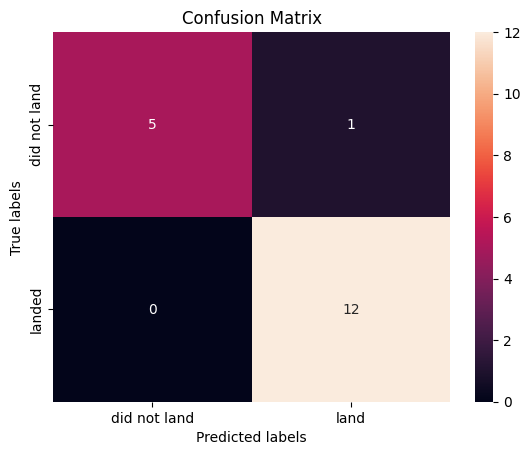

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, parameters, cv=10, return_train_score=True, verbose=4)

In [ ]:
knn_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV 1/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.625) total time=   0.0s
[CV 3/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 5/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 6/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 7/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.857) total time=   0.0s
[CV 8/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 9/10] END algorithm=auto, n_neighbors=1, p=1;, score=(train=1.000, test=0.714) total time=   0.0s
[CV 10/10] END algo

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             return_train_score=True, verbose=4)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [ ]:
knn_cv.score(X_test, Y_test)

0.7777777777777778

We can plot the confusion matrix


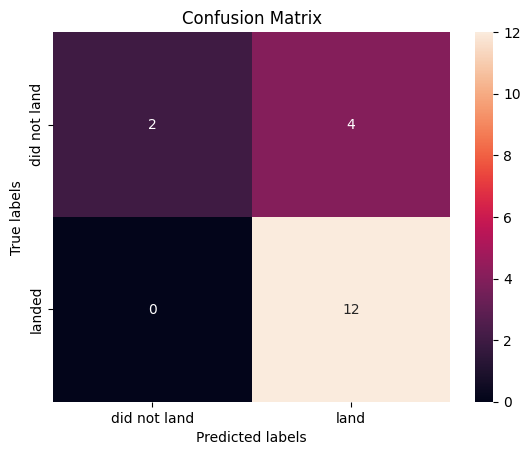

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  12


Find the method performs best:


In [ ]:
scores = pd.DataFrame({"Method": ["Logistic Regression", "Support Vector Machines", "Decision Tree", "K Nearest Neighbors"],
                       "Score": [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test),
                                  knn_cv.score(X_test, Y_test)]})

<Axes: xlabel='Method', ylabel='Score'>

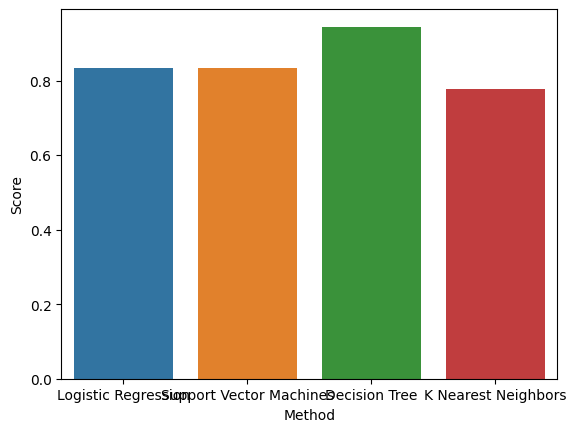

In [ ]:
sns.barplot(data=scores, x="Method", y="Score")

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
